In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

nerchinskiy zavod ru
kadoshkino ru
mar del plata ar
tessalit ml
bayevo ru
zhezkazgan kz
carnarvon au
hermanus za
kodiak us
nizhneyansk ru
thompson ca
rikitea pf
bathsheba bb
rosetta eg
fuyu cn
bluff nz
mataura pf
mataura pf
rikitea pf
busselton au
meyungs pw
hobart au
coihaique cl
georgetown sh
longyearbyen sj
upington za
rikitea pf
ponta do sol cv
cidreira br
sept-iles ca
kaitangata nz
green valley us
karaul ru
new norfolk au
ushuaia ar
chambersburg us
sabalgarh in
port alfred za
russkiy aktash ru
jamestown sh
amderma ru
kamra pk
bluff nz
punta arenas cl
iqaluit ca
wajir ke
yagodnoye ru
bethel us
cuenca es
shimoda jp
dzhusaly kz
hermanus za
toora-khem ru
rikitea pf
faanui pf
narsaq gl
cape town za
port keats au
bambous virieux mu
amderma ru
new norfolk au
atuona pf
ribeira grande pt
sabha ly
port lincoln au
khatanga ru
barrow us
atuona pf
bonthe sl
atuona pf
hilo us
tasiilaq gl
cape town za
minab ir
codrington ag
mataura pf
luganville vu
rock sound bs
amberley nz
liuhe cn
barrow us
us

ushuaia ar
poum nc
albany au
digha in
qaanaaq gl
weligama lk
mataura pf
albany au
taolanaro mg
avarua ck
havelock nz
grand river south east mu
ulaanbaatar mn
tabuk sa
rikitea pf
new norfolk au
ribeira grande pt
salalah om
lebu cl
rikitea pf
taolanaro mg
illoqqortoormiut gl
puerto ayora ec
hobyo so
saint anthony ca
longyearbyen sj
razdolinsk ru
qaqortoq gl
muravlenko ru
taolanaro mg
ostrovnoy ru
barrow us
maridi sd
ribeira grande pt
taolanaro mg
ostersund se
fairbanks us
butaritari ki
mende fr
saskylakh ru
nome us
champerico gt
punta arenas cl
limon cr
manoel urbano br
gazanjyk tm
ushuaia ar
illoqqortoormiut gl
vaini to
taman ru
pipri in
bud no
busselton au
beidao cn
ondorhaan mn
khatanga ru
sechura pe
correntina br
chuy uy
souillac mu
narsaq gl
grindavik is
rikitea pf
saint-philippe re
bandar id
ushuaia ar
avarua ck
katsuura jp
illoqqortoormiut gl
cape town za
puerto quijarro bo
hit iq
airai pw
barrow us
rikitea pf
beringovskiy ru
cape town za
punta arenas cl
beringovskiy ru
puro ph
ma

rikitea pf
bethel us
belushya guba ru
chicama pe
neuquen ar
negara id
illoqqortoormiut gl
taolanaro mg
tuktoyaktuk ca
moussoro td
rydultowy pl
barrow us
qaanaaq gl
kodiak us
vagay ru
hobart au
ust-kamchatsk ru
ponta do sol cv
mendoza ar
ushuaia ar
amapa br
arraial do cabo br
kollegal in
porto santo pt
kidal ml
cidreira br
whitefish us
atuona pf
nueva guinea ni
albany au
vredendal za
atar mr
ushuaia ar
provideniya ru
hobart au
puerto ayora ec
qaanaaq gl
rikitea pf
lipin bor ru
port alfred za
ushuaia ar
filingue ne
bytow pl
novospasskoye ru
ushuaia ar
cape town za
bluff nz
chalmette us
new norfolk au
beidao cn
cape town za
port alfred za
warrnambool au
kudat my
barentsburg sj
padang id
provideniya ru
qaanaaq gl
port alfred za
chuy uy
hermanus za
hamilton bm
ketchikan us
mataura pf
hobart au
rikitea pf
kushima jp
flin flon ca
busselton au
cape town za
lebu cl
zhigansk ru
cape town za
busselton au
kapaa us
castro cl
avarua ck
cabatuan ph
paoua cf
lebu cl
meulaboh id
nefteyugansk ru
barrow 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [13]:
# Import the requests library.
import requests as req

# Import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=66fb448eed456d6901340909ad508395


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 12 of Set 25 | nerchinskiy zavod
Processing Record 13 of Set 25 | kadoshkino
Processing Record 14 of Set 25 | mar del plata
Processing Record 15 of Set 25 | tessalit
Processing Record 16 of Set 25 | bayevo
Processing Record 17 of Set 25 | zhezkazgan
Processing Record 18 of Set 25 | carnarvon
Processing Record 19 of Set 25 | hermanus
Processing Record 20 of Set 25 | kodiak
Processing Record 21 of Set 25 | nizhneyansk
City not found. Skipping...
Processing Record 22 of Set 25 | thompson
Processing Record 23 of Set 25 | rikitea
Processing Record 24 of Set 25 | bathsheba
Processing Record 25 of Set 25 | rosetta
Processing Record 26 of Set 25 | fuyu
Processing Record 27 of Set 25 | bluff
Processing Record 28 of Set 25 | mataura
Processing Record 29 of Set 25 | busselton
Processing Record 30 of Set 25 | meyungs
City not found. Skipping...
Processing Record 31 of Set 25 | hobart
Processing Record 32 of Set 25 | coihaique
Processing Record 33 of Set 25 | georgetown
Processing

Processing Record 30 of Set 28 | puerto varas
Processing Record 31 of Set 28 | barentsburg
City not found. Skipping...
Processing Record 32 of Set 28 | souillac
Processing Record 33 of Set 28 | guerrero negro
Processing Record 34 of Set 28 | katsuura
Processing Record 35 of Set 28 | bathurst
Processing Record 36 of Set 28 | nome
Processing Record 37 of Set 28 | barawe
City not found. Skipping...
Processing Record 38 of Set 28 | lebu
Processing Record 39 of Set 28 | moerai
Processing Record 40 of Set 28 | san cristobal
Processing Record 41 of Set 28 | komsomolskiy
Processing Record 42 of Set 28 | dingle
Processing Record 43 of Set 28 | tarn taran
Processing Record 44 of Set 28 | hithadhoo
Processing Record 45 of Set 28 | tazovskiy
Processing Record 46 of Set 28 | nuuk
Processing Record 47 of Set 28 | lavrentiya
Processing Record 48 of Set 28 | sibolga
Processing Record 49 of Set 28 | pacific grove
Processing Record 50 of Set 28 | kununurra
Processing Record 1 of Set 29 | lichinga
Proces

Processing Record 14 of Set 32 | shima
Processing Record 15 of Set 32 | vanatori-neamt
Processing Record 16 of Set 32 | marsh harbour
Processing Record 17 of Set 32 | high prairie
Processing Record 18 of Set 32 | pervomayskiy
Processing Record 19 of Set 32 | gazli
Processing Record 20 of Set 32 | saint-joseph
Processing Record 21 of Set 32 | vanavara
Processing Record 22 of Set 32 | mecca
Processing Record 23 of Set 32 | valparaiso
Processing Record 24 of Set 32 | tartagal
Processing Record 25 of Set 32 | rabo de peixe
Processing Record 26 of Set 32 | hermosillo
Processing Record 27 of Set 32 | poum
Processing Record 28 of Set 32 | digha
Processing Record 29 of Set 32 | weligama
Processing Record 30 of Set 32 | havelock
Processing Record 31 of Set 32 | ulaanbaatar
Processing Record 32 of Set 32 | tabuk
Processing Record 33 of Set 32 | saint anthony
Processing Record 34 of Set 32 | razdolinsk
Processing Record 35 of Set 32 | qaqortoq
Processing Record 36 of Set 32 | muravlenko
Processin

Processing Record 6 of Set 36 | bubaque
Processing Record 7 of Set 36 | kaura namoda
Processing Record 8 of Set 36 | marsala
Processing Record 9 of Set 36 | le port
Processing Record 10 of Set 36 | ugoofaaru
Processing Record 11 of Set 36 | vanino
Processing Record 12 of Set 36 | morondava
Processing Record 13 of Set 36 | dubrovka
Processing Record 14 of Set 36 | kloulklubed
Processing Record 15 of Set 36 | muko
Processing Record 16 of Set 36 | puerto el triunfo
Processing Record 17 of Set 36 | rawannawi
City not found. Skipping...
Processing Record 18 of Set 36 | pangnirtung
Processing Record 19 of Set 36 | saurimo
Processing Record 20 of Set 36 | qeshm
Processing Record 21 of Set 36 | mazamari
Processing Record 22 of Set 36 | russell
Processing Record 23 of Set 36 | westport
Processing Record 24 of Set 36 | maxixe
Processing Record 25 of Set 36 | danjiangkou
Processing Record 26 of Set 36 | margate
Processing Record 27 of Set 36 | impfondo
Processing Record 28 of Set 36 | brae
Proces

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nerchinskiy Zavod,51.3088,119.6100,62.60,64,75,4.14,RU,2021-06-10 05:12:58
1,Kadoshkino,54.0257,44.4191,61.61,90,95,9.98,RU,2021-06-10 05:12:58
2,Mar Del Plata,-38.0023,-57.5575,61.09,45,90,1.01,AR,2021-06-10 05:12:59
3,Tessalit,20.1986,1.0114,90.37,12,2,11.90,ML,2021-06-10 05:12:59
4,Bayevo,53.2833,80.7667,60.35,41,49,12.10,RU,2021-06-10 05:12:59
5,Zhezkazgan,47.8043,67.7144,74.91,37,96,4.43,KZ,2021-06-10 05:13:00
6,Carnarvon,-24.8667,113.6333,71.67,1,75,9.22,AU,2021-06-10 05:13:00
7,Hermanus,-34.4187,19.2345,56.89,77,0,3.20,ZA,2021-06-10 05:13:01
8,Kodiak,57.7900,-152.4072,47.71,87,90,20.71,US,2021-06-10 05:08:56
9,Thompson,55.7435,-97.8558,54.95,76,77,6.93,CA,2021-06-10 05:13:02


In [27]:
new_column_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_reorder]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nerchinskiy Zavod,RU,2021-06-10 05:12:58,51.3088,119.6100,62.60,64,75,4.14
1,Kadoshkino,RU,2021-06-10 05:12:58,54.0257,44.4191,61.61,90,95,9.98
2,Mar Del Plata,AR,2021-06-10 05:12:59,-38.0023,-57.5575,61.09,45,90,1.01
3,Tessalit,ML,2021-06-10 05:12:59,20.1986,1.0114,90.37,12,2,11.90
4,Bayevo,RU,2021-06-10 05:12:59,53.2833,80.7667,60.35,41,49,12.10
...,...,...,...,...,...,...,...,...,...
562,Flin Flon,CA,2021-06-10 05:17:06,54.7682,-101.8650,55.18,81,63,4.03
563,Cabatuan,PH,2021-06-10 05:17:06,10.8794,122.4860,82.38,75,100,3.80
564,Paoua,CF,2021-06-10 05:17:07,7.2427,16.4406,70.32,86,100,4.41
565,Meulaboh,ID,2021-06-10 05:17:07,4.1363,96.1285,83.43,65,99,3.42


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

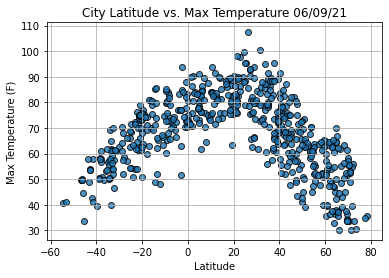

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

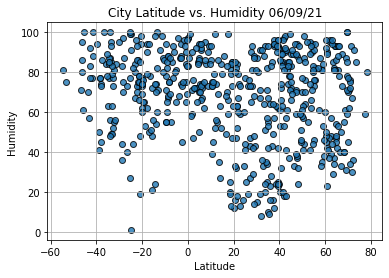

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

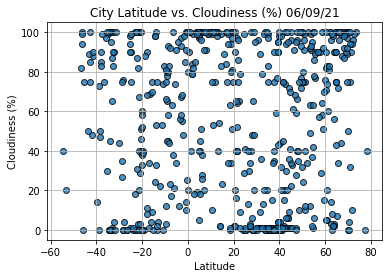

In [42]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

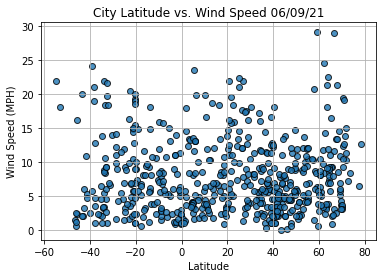

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [44]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
